In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import os
import tweepy
import json
import time
import re

## Gathering

In [2]:
#Load the csv provided by WeRateDogs as a Dataframe
enhanced_df = pd.read_csv('twitter-archive-enhanced.csv')
enhanced_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [3]:
#Use requests to get the image predictions, save them, and load as a Dataframe


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
if not os.path.exists('image-predictions.tsv'):
    
    request = requests.get(url)
    with open('image-predictions.tsv', mode='wb') as file:
        file.write(request.content)

pred_df = pd.read_csv('image-predictions.tsv', sep='\t')

pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [4]:

if not os.path.exists('tweet_json.txt'):
    
#    consumer_key = 
#    consumer_secret = 
#    access_token = 
#    access_secret = 

    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_secret)

    api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
    
    tweet_ids = enhanced_df.tweet_id.values
    id_length = len(tweet_ids)
    
    count = 0 
    
    fails = {}
    
    start = time.time()
    
    with open('tweet_json.txt', mode='w') as file:
        
        for tweet_id in tweet_ids:
            count += 1
            if count % 10 == 0:
                current = time.time() - start
                print(f"{count}/{id_length} ID: {tweet_id}. Current Time: {current} ")
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                json.dump(tweet._json, file)
    
                file.write('\n')
                
                
            except tweepy.TweepError as e:
                print(f"Fail on {count}/{id_length}: {tweet_id}")
                fails[tweet_id] = e
                pass
    print('---Fails---')
    print(fails)
    print('\n\n')
                           
fave_retweets_df = pd.read_json('tweet_json.txt', lines=True)
fave_retweets_df.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37822,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,8247,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32503,False,This is Tilly. She's just checking pup on you....,NaN,...,NaN,NaN,NaN,NaN,6092,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,NaN,NaN,NaN,NaN,4032,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41169,False,This is Darla. She commenced a snooze mid meal...,NaN,...,NaN,NaN,NaN,NaN,8400,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39351,False,This is Franklin. He would like you to stop ca...,NaN,...,NaN,NaN,NaN,NaN,9097,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing

In [5]:
enhanced_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
enhanced_df.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [7]:
enhanced_df.query('rating_denominator != 10').to_csv('odd_denominators.csv', index=False)

![title](denominators.png)

In [8]:
enhanced_df.nlargest(10, 'rating_numerator')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None


In [9]:
enhanced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
enhanced_df[enhanced_df.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [11]:
enhanced_df.name.value_counts()

None           745
a               55
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Lola            10
Tucker          10
Penny           10
Winston          9
Bo               9
Sadie            8
the              8
Bailey           7
Buddy            7
an               7
Toby             7
Daisy            7
Koda             6
Dave             6
Jack             6
Stanley          6
Oscar            6
Milo             6
Bella            6
Scout            6
Rusty            6
Leo              6
Jax              6
Finn             5
              ... 
Ole              1
Ron              1
Obie             1
Lilli            1
Ben              1
Todo             1
Norman           1
Gustav           1
Evy              1
Mike             1
Dobby            1
infuriating      1
Moofasa          1
Bruiser          1
Ike              1
Mo               1
Lacy             1
Mimosa           1
Mauve            1
Napolean         1
Orion            1
Snoop       

In [12]:
enhanced_df[enhanced_df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
actually         2
getting          2
not              2
mad              2
officially       1
space            1
incredibly       1
all              1
light            1
my               1
by               1
unacceptable     1
infuriating      1
old              1
this             1
his              1
such             1
life             1
Name: name, dtype: int64

In [13]:
enhanced_df.query('name=="O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [14]:
enhanced_df[enhanced_df.duplicated('text')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
fave_retweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2339 non-null datetime64[ns]
display_text_range               2339 non-null object
entities                         2339 non-null object
extended_entities                2065 non-null object
favorite_count                   2339 non-null int64
favorited                        2339 non-null bool
full_text                        2339 non-null object
geo                              0 non-null float64
id                               2339 non-null int64
id_str                           2339 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [16]:
fave_retweets_df[fave_retweets_df.retweeted_status.notna()]

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
31,NaN,NaN,2017-07-15 02:45:48,"[0, 50]","{'hashtags': [{'text': 'BATP', 'indices': [21,...",NaN,0,False,RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,NaN,...,NaN,8.860534e+17,8.860534e+17,"{'url': 'https://t.co/WxwJmvjfxo', 'expanded':...",104,False,{'created_at': 'Sat Jul 15 02:44:07 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
35,NaN,NaN,2017-07-13 01:35:06,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 830583314243268608, 'id_str'...",0,False,RT @dog_rates: This is Lilly. She just paralle...,NaN,...,NaN,NaN,NaN,NaN,18019,False,{'created_at': 'Sun Feb 12 01:04:29 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
67,NaN,NaN,2017-06-26 00:13:58,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Emmy. She was adopted t...,NaN,...,NaN,NaN,NaN,NaN,6639,False,{'created_at': 'Fri Jun 23 01:10:23 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
72,NaN,NaN,2017-06-24 00:09:53,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Shadow. In an attempt to r...,NaN,...,NaN,NaN,NaN,NaN,1252,False,{'created_at': 'Fri Jun 23 16:00:04 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
73,NaN,NaN,2017-06-23 18:17:33,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Terrance. He's being yelle...,NaN,...,NaN,NaN,NaN,NaN,6486,False,{'created_at': 'Tue Nov 24 03:51:38 +0000 2015...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
77,NaN,NaN,2017-06-21 19:36:23,"[0, 122]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 876850756556607488, 'id_str'...",0,False,RT @rachel2195: @dog_rates the boyfriend and h...,NaN,...,NaN,NaN,NaN,NaN,78,False,{'created_at': 'Mon Jun 19 17:14:49 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
90,NaN,NaN,2017-06-13 01:14:41,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Coco. At first I though...,NaN,...,NaN,NaN,NaN,NaN,14398,False,{'created_at': 'Sun May 21 16:48:45 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
95,NaN,NaN,2017-06-10 00:35:19,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Sierra. She's one preci...,NaN,...,NaN,NaN,NaN,NaN,1554,False,{'created_at': 'Fri Jun 09 16:22:42 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
105,NaN,NaN,2017-06-04 00:46:17,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Dawn. She's just checki...,NaN,...,NaN,NaN,NaN,NaN,5614,False,{'created_at': 'Mon Mar 13 00:02:39 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
119,NaN,NaN,2017-05-28 01:26:04,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Say hello to Cooper. His expres...,NaN,...,NaN,NaN,NaN,NaN,2081,False,{'created_at': 'Sat May 27 19:39:34 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
tweet_json = []
for tweet in open('tweet_json.txt', 'r'):
    loads = json.loads(tweet)
    tweet_json.append({'tweet_id':loads['id'], 'favorite_count':loads['favorite_count'], 
                       'retweet_count': loads['retweet_count']})
tweet_popularity_df = pd.DataFrame(tweet_json)
tweet_popularity_df.head()

,favorite_count,retweet_count,tweet_id
0,37822,8247,892420643555336193
1,32503,6092,892177421306343426
2,24461,4032,891815181378084864
3,41169,8400,891689557279858688
4,39351,9097,891327558926688256


In [18]:
tweet_popularity_df.describe()

,favorite_count,retweet_count,tweet_id
count,2339.000000,2339.000000,2.339000e+03
mean,7906.979906,2906.542112,7.421620e+17
std,12255.139644,4900.218711,6.828729e+16
min,0.000000,0.000000,6.660209e+17
25%,1367.000000,584.000000,6.783378e+17
50%,3440.000000,1355.000000,7.186133e+17
75%,9688.500000,3387.500000,7.986907e+17
max,163322.000000,83056.000000,8.924206e+17


In [19]:
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Dirty:
1. The following ids grabbed the wrong numerator/denominator:  !
        740373189193256964, 722974582966214656, 
        716439118184652801, 682962037429899265, 
        666287406224695296, 883482846933004288,	
        
2. The following ids are not actual ratings: !
        835246439529840640, 832088576586297345, 
        810984652412424192, 686035780142297088, 
        682808988178739200, 838150277551247360,
        826598799820865537
3. Retweets are included  !
4. Dog type columns do not recognize plural forms !
5. Incorrect data types (timestamp, dog type in enhanced_df, predictions in pred_df) !
6. Lowercase names are random words !
7. 776201521193218049 has the name as O, instead of O'Malley !
8. Differing number of columns in each dataframe  !
9. Missing names and dog types **(Can't fix right now)**
10. Ratings can be a ratio !
11. Outliers disrupt averages
### Messy:
1. Dog type spread across multiple columns ! 
2. Data spread across multiple dataframes !
3. source is a repetitive column, other unimportant columns 

## Cleaning

In [20]:
enhanced_clean = enhanced_df.copy()
pred_clean = pred_df.copy()
tweet_popularity_clean = tweet_popularity_df.copy()

### Retweeted statuses
We only want original tweets in our dataset.

##### Define
Remove all retweeted statuses

##### Code

In [21]:
enhanced_clean  = enhanced_clean[enhanced_clean.retweeted_status_id.isnull()]

##### Test

In [22]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Missing dog types
Enhanced dataset didn't grab pluralized forms of dog types.

##### Define
Use regular expressions to fill in missing dog types

##### Code

In [23]:
enhanced_clean.loc[enhanced_clean.text.str.contains('doggo', flags=re.IGNORECASE), 'dog_type'] = 'doggo'
enhanced_clean.loc[enhanced_clean.text.str.contains('floofer', flags=re.IGNORECASE), 'dog_type'] = 'floofer'
enhanced_clean.loc[enhanced_clean.text.str.contains('pupper', flags=re.IGNORECASE), 'dog_type'] = 'pupper'
enhanced_clean.loc[enhanced_clean.text.str.contains('puppo',flags=re.IGNORECASE), 'dog_type'] = 'puppo'

##### Test

In [24]:
print(enhanced_clean.dog_type.value_counts())
print('\n')
print(enhanced_clean.doggo.value_counts())
print('\n')
print(enhanced_clean.floofer.value_counts())
print('\n')
print(enhanced_clean.pupper.value_counts())
print('\n')
print(enhanced_clean.puppo.value_counts())

pupper     260
doggo       82
puppo       33
floofer     10
Name: dog_type, dtype: int64


None     2088
doggo      87
Name: doggo, dtype: int64


None       2165
floofer      10
Name: floofer, dtype: int64


None      1941
pupper     234
Name: pupper, dtype: int64


None     2150
puppo      25
Name: puppo, dtype: int64


### Incorrect names
Enhanced dataset incorrectly grabbed regular words as names, and mistranslated O'Malley's name.

##### Define
Replace lowercase names with 'None'

##### Code

In [25]:
enhanced_clean.loc[enhanced_clean.name.str.islower(), 'name'] = "None"

##### Test

In [26]:
enhanced_clean.name.value_counts()

None         784
Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
Tucker         9
Winston        8
Sadie          8
Lola           8
Daisy          7
Toby           7
Stanley        6
Bella          6
Oscar          6
Jax            6
Bailey         6
Bo             6
Koda           6
Chester        5
Bentley        5
Rusty          5
Leo            5
Louis          5
Milo           5
Dave           5
Buddy          5
Scout          5
Winnie         4
Alfie          4
            ... 
Harnold        1
Tater          1
Cheesy         1
Pluto          1
Harlso         1
Chompsky       1
Tilly          1
Fletcher       1
Theo           1
Berkeley       1
Iggy           1
Acro           1
Dewey          1
Einstein       1
Anna           1
Vinnie         1
Simba          1
Rudy           1
Kody           1
Pavlov         1
Schnozz        1
Horace         1
Jockson        1
Trigger        1
Scruffers      1
Tyrus          1
Emanuel        1
Pinot         

##### Define
Replace the name "O" with O'Malley


##### Code

In [27]:
enhanced_clean.loc[enhanced_clean.name == 'O', 'name'] = "O'Malley"

##### Test

In [28]:
enhanced_clean.query('tweet_id == 776201521193218049')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O'Malley,None,None,None,None,NaN


### Incorrect Ratios


##### Define
Convert ratio to floats, then correct found incorrect ratios

##### Code

In [29]:
for col in ['rating_numerator', 'rating_denominator']:
    enhanced_clean[col] = enhanced_clean[col].astype('float')
correct_ratios ={'740373189193256964': [14,10],
                 '722974582966214656': [13,10],
                 '716439118184652801': [11,10],
                 '682962037429899265': [10,10],
                 '666287406224695296':  [9,10],
                 '883482846933004288': [13.5, 10] }
for tweet, ratio in correct_ratios.items():
    enhanced_clean.loc[enhanced_clean.tweet_id==int(tweet),['rating_numerator', 'rating_denominator']] = [ratio[0],ratio[1]]


##### Test

In [30]:
enhanced_clean[enhanced_clean.tweet_id.isin(list(map(int, correct_ratios.keys())))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,13.5,10.0,Bella,None,None,None,None,NaN
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,14.0,10.0,None,None,None,None,None,NaN
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,13.0,10.0,None,None,None,None,None,NaN
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,11.0,10.0,Bluebert,None,None,None,None,NaN
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,10.0,10.0,Darrel,None,None,None,None,NaN
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,9.0,10.0,None,None,None,None,None,NaN


### Remove non-ratings

##### Define
Remove rows that are not ratings

##### Code

In [31]:
not_ratings =[835246439529840640, 832088576586297345, 810984652412424192, 
              686035780142297088, 682808988178739200, 838150277551247360,
              826598799820865537]
enhanced_clean = enhanced_clean[~enhanced_clean.tweet_id.isin(not_ratings)]

##### Test

In [32]:
enhanced_clean[enhanced_clean.tweet_id.isin(not_ratings)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type


### Incorrect data types

##### Define
enhanced_clean: Convert timestamp to datatime. Convert dog_type to categorical.  
pred_clean: Convert p1,p2,p3 to categorical

##### Code

In [33]:
enhanced_clean.timestamp = pd.to_datetime(enhanced_clean.timestamp)
enhanced_clean.dog_type = enhanced_clean.dog_type.astype('category')

In [34]:
predictions = ['p1','p2','p3']
for p in predictions:
    pred_clean[p] = pred_clean[p].astype('category')

##### Test

In [35]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2168 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2168 non-null int64
in_reply_to_status_id         72 non-null float64
in_reply_to_user_id           72 non-null float64
timestamp                     2168 non-null datetime64[ns]
source                        2168 non-null object
text                          2168 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2116 non-null object
rating_numerator              2168 non-null float64
rating_denominator            2168 non-null float64
name                          2168 non-null object
doggo                         2168 non-null object
floofer                       2168 non-null object
pupper                        2168 non-null object
puppo                         2168 non-null object
dog_type                  

In [36]:
pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null category
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null category
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null category
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(3), float64(3), int64(2), object(1)
memory usage: 174.9+ KB


### Ratings as a ratio

##### Define
Divide rating_numerator by rating_denominator to get rating

##### Code

In [37]:
enhanced_clean['rating'] = (enhanced_clean.rating_numerator / enhanced_clean.rating_denominator)

##### Test

In [38]:
enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,None,None,None,None,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,None,None,None,None,NaN,1.2


### Data spread across 3 dataframes, variant number of tweets

##### Define
Merge the 3 dataframes, using inner joins so we only get tweet_id s present in all dataframes.

##### Code

In [39]:
clean_df = enhanced_clean.merge(tweet_popularity_clean, how="inner", on="tweet_id")
clean_df = clean_df.merge(pred_clean, how="inner", on="tweet_id")

##### Test

In [40]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 32 columns):
tweet_id                      1990 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null datetime64[ns]
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null float64
rating_denominator            1990 non-null float64
name                          1990 non-null object
doggo                         1990 non-null object
floofer                       1990 non-null object
pupper                        1990 non-null object
puppo                         1990 non-null object
dog_type                  

In [41]:
clean_df.img_num.value_counts()

1    1708
2     190
3      62
4      30
Name: img_num, dtype: int64

### Unneeded Columns

##### Define
Remove source, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, doggo, floofer,  pupper, puppo

##### Code

In [42]:
clean_df.drop(['source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 
               'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [43]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 23 columns):
tweet_id                 1990 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1990 non-null datetime64[ns]
text                     1990 non-null object
rating_numerator         1990 non-null float64
rating_denominator       1990 non-null float64
name                     1990 non-null object
dog_type                 342 non-null category
rating                   1990 non-null float64
favorite_count           1990 non-null int64
retweet_count            1990 non-null int64
jpg_url                  1990 non-null object
img_num                  1990 non-null int64
p1                       1990 non-null category
p1_conf                  1990 non-null float64
p1_dog                   1990 non-null bool
p2                       1990 non-null category
p2_conf                  1990 non-null float64
p2_dog   

### Outliers

##### Define
Remove largest and smallest values of rating, retweet_count, and favorite_count

##### Code

In [44]:
for col in ['rating', 'retweet_count', 'favorite_count']:
    clean_df = clean_df[(clean_df[col] < np.percentile(clean_df[col],98)) & (clean_df[col] > np.percentile(clean_df[col],2))]

##### Test

In [48]:
print(f"Rating Min: {clean_df.rating.min()} Max: {clean_df.rating.max()}")
print(f"Favorite Min: {clean_df.favorite_count.min()} Max: {clean_df.favorite_count.max()}")
print(f"Retweet Min: {clean_df.retweet_count.min()} Max: {clean_df.retweet_count.max()}")
      

Rating Min: 0.5 Max: 1.3
Favorite Min: 331 Max: 32377
Retweet Min: 78 Max: 14357


##### Store as csv

In [45]:
clean_df.to_csv('twitter_archive_master.csv', index=False)

## Exploration

### How have things changed over time?
The first thing I thought to explore was the impact of time. For favorites and retweets, this was intuition - these are likely to change as the popularity of the twitter account changes. As for rating, during assessing I notice some more traditional ratings (numerator lower than denominator) during the earlier days of the account, so I wanted to visualize and confirm.

In [66]:
def column_over_time(col):
    '''Plots a 30-day rolling average'''
    

    fig, ax = plt.subplots()
    ax.plot(clean_df.timestamp, clean_df.set_index('timestamp').rolling(window=30)[col].mean())
    plt.title(f"{col.capitalize()} 30-day rolling average, over time.")
    plt.xlabel('Date')
    plt.ylabel(col.capitalize())

    fig.autofmt_xdate();

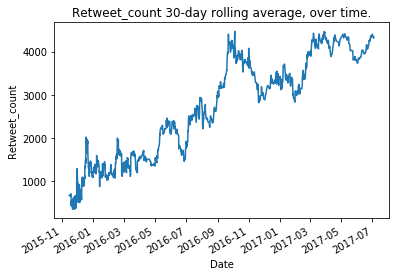

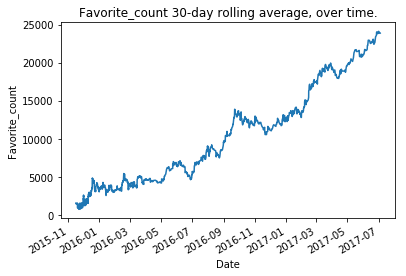

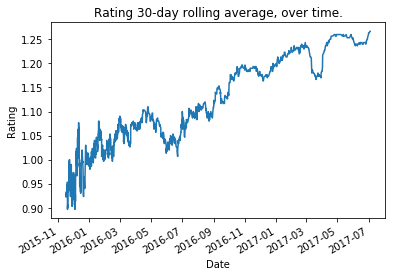

In [67]:
for col in ['retweet_count','favorite_count', 'rating']:
    column_over_time(col)

### Is it a dog?
I also wanted to look at the impact of our prediction dataset predicting a dog on popularity and rating. Now, this is still super messy - I don't know the accuracy of the neural network, I'm not filtering by confidence, etc. But it would be interesting to see.

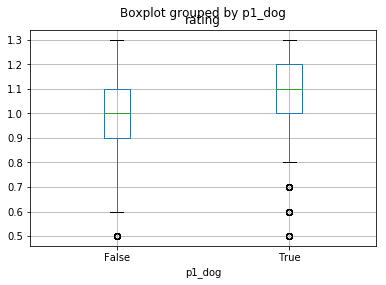

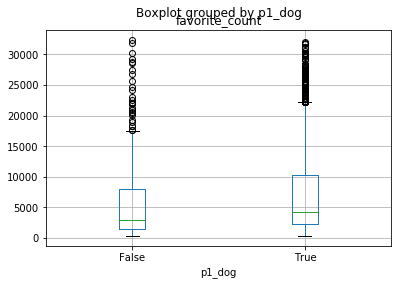

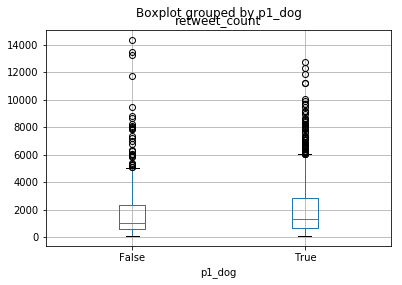

In [74]:
for i in ['rating','favorite_count', 'retweet_count']:
    
    clean_df.boxplot(i, 'p1_dog');

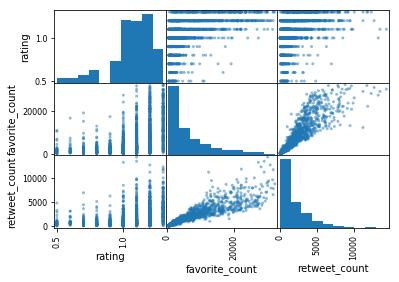

In [73]:
pd.plotting.scatter_matrix(clean_df[['rating','favorite_count', 'retweet_count']]) ;